<div id="container" style="position:relative;">
<div style="float:left"><h1> Python Project Sprint - Part 2 </h1></div>
<div style="position:relative; float:right">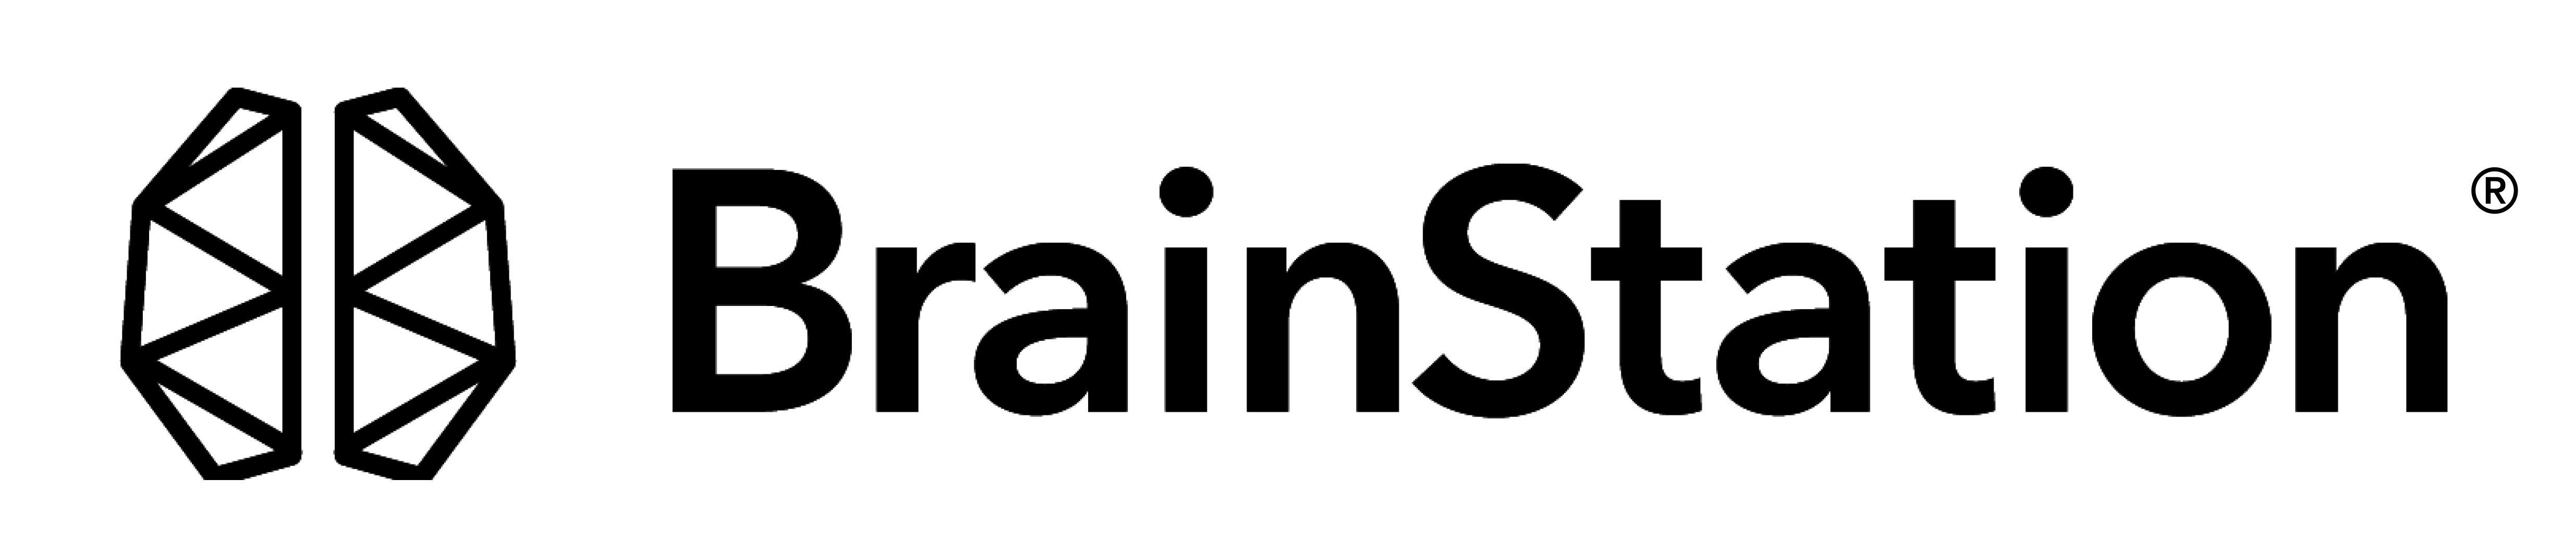
</div>
</div>


# Timi Olaoye #

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# E-commerce Dataset Overview

In this Python Project Sprint, we'll be working with a dataset derived from an online e-commerce platform. The dataset captures customer purchase records, reflecting the shopping behavior and interactions of users. It includes important details such as purchase dates, product categories, amounts spent, customer demographics, and payment methods.

This dataset is a valuable tool for:

1. Identifying popular product categories and purchase trends.
2. Analyzing customer spending patterns and behaviors.
3. Examining transaction frequency and payment preferences.
4. Building recommender systems and planning marketing strategies.

You can find the data dictionary for this dataset below.

---

## Data Dictionary

| Column Name               | Data Type | Description                                                                                     |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------|
| `Customer ID`             | int       | Unique identifier for each customer.                                                            |
| `Age`                     | string    | Customer's age in years. |
| `Gender`                  | string    | Gender of the customer.                                         |
| `Item Purchased`          | string    | Name of the item purchased by the customer.                     |
| `Category`                | string    | Product category the item belongs to.                                                           |
| `Purchase Amount (USD)`   | float     | The amount of money spent on the purchase, in USD.                                              |
| `Location`                | string    | The customer's location (state or region).                          |
| `Size`                    | string    | Size of the purchased item (e.g., S, M, L).                                                     |
| `Color`                   | string    | Color of the purchased item.                                                                    |
| `Discount Applied`        | string    | Indicates if a discount was applied ("Yes" or "No").                                            |
| `Promo Code Used`         | string    | Indicates if a promotional code was used ("Yes" or "No").                                       |
| `Previous Purchases`      | float     | Number of previous purchases made by the customer.                                              |
| `Payment Method`          | string    | Payment method used by the customer.         |
| `Frequency of Purchases`  | string    | Frequency of purchases by the customer (e.g., Weekly, Monthly).                       |
| `user id`                 | float     | ID of the user associated with the purchase.    |
| `product id`              | string    | Unique identifier for the purchased product.    |
| `Interaction type`        | string    | Type of interaction the customer had with the product (e.g., purchase, view, like).             |
| `Time stamp`              | string    | Date and time of the transaction or interaction (in DD/MM/YYYY HH:MM format).                   |

# Data Visualizations

In part 1 of our Python Project Sprint, we went through the cleaning process of the e-commerce dataset and saved it as a new `csv` file. This is good practice, as data analysis pipelines are typically built in a modular way with cleaning performed first. The cleaned dataset is then stored and used in a separate module for business analysis and visualization.

We will begin by creating a Python function that can take in any raw dataset (such as our uncleaned e-commerce dataset), perform all cleaning steps, and store it for analysis. Then, we will go through the process of visualization to create charts that can help us delve into the data and extract insights from it.

## Data Cleaning Pipeline

Let's create a function to automate our data cleaning process. This function will apply all the steps we've discussed to a raw dataset and return the cleaned data. It takes five parameters:

1. `dataframe`: The input DataFrame to be cleaned.
2. `drop_duplicates`: Boolean indicating whether to remove duplicate rows.
3. `remove_missing`: Boolean indicating whether to remove rows with missing values.
4. `dropping_columns`: List of column names to be dropped.
5. `renaming_columns`: Dictionary of columns that should be renamed.

This function will streamline our data preparation workflow, making it easier to consistently clean multiple datasets.

In [7]:
# Cleaning function

def clean_dataframe(df:pd.DataFrame(), drop_duplicates:bool =True, remove_missing:bool =True, dropping_columns:list = None,
                    renaming_columns:dict={}) -> pd.DataFrame():
    """
    Cleans the given dataframe by performing the following operations:

    - Drops specified columns.
    - Removes missing values if specified.
    - Removes duplicate rows if specified.
    - Replaces ',' with '.' in the 'Age' column.
    - Replaces '\n' with '' in the 'Payment Method' column.
    - Drops columns if specified.
    - Renames columns if specified.
    - Converts all object columns to lowercase.

    Parameters:
    df (pd.DataFrame): The dataframe to be cleaned.
    drop_duplicates (bool): If True, remove duplicate rows. Default is True.
    remove_missing (bool): If True, remove rows with missing values. Default is True.
    dropping_columns (list): Name of the columns that have to get dropped.
    renaming_columns (dict): Dictionary with the old and new name of the columns.

    Returns:
    pd.DataFrame: The cleaned dataframe.

    """

    # Step 1: drop column
    df.drop(columns = dropping_columns, axis = 1, inplace = True)


    # Step 2: Remove missing values
    if remove_missing:
        df = df.dropna()

   # Step 3: Remove duplicates
    if drop_duplicates:
        df = df.drop_duplicates()

    # Step 4: Replace commas with periods in 'Age' column (ensure the column exists)
    if 'Age' in df.columns:
        df['Age'] = df['Age'].str.replace(',', '.')

    # Step 5: Remove newlines in 'Payment Method' column (ensure the column exists)
    if 'Vendor' in df.columns:
        df['Payment Method'] = df['Payment Method'].str.replace('\n', '')

    # Step 6: Convert all object columns to lowercase
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

    # Step 7: Rename all columns that are specified in renaming columns parameter
    df.rename(columns=renaming_columns, inplace=True)

    # Step8: Reindexing and sorting
    df.set_index('Customer ID', inplace=True, drop=True)
    df.sort_index(inplace=True)

    return df
   

In [10]:
# Load the raw dataset once again
df = pd.read_csv('e-commerce.csv')

df.head()

Unnamed: 0  Customer ID   Age Gender Item Purchased  Category  \
0           0            1  55,0   Male         bLOuSE  Clothing   
1           1            2  19,0   Male        SWEaTer  Clothing   
2           2            3  50,0   Male          jeaNS  Clothing   
3           3            4  21,0   Male        saNdals  Footwear   
4           4            5  45,0   Male         BLoUSE  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       KeNtUCkY    L       Gray  Winter   
1                     64          MaINe    L     Maroon  Winter   
2                     73  MASSAcHUsetTs    S     Maroon  Spring   
3                     90   RHodE IsLAnD    M     Maroon  Spring   
4                     49         OReGON    M  Turquoise  Spring   

   Review Rating Subscription Status  Shipping Type Discount Applied  \
0            3.1                 Yes        Express              Yes   
1            3.1                 Yes        Express              Yes   
2            3.1                 Yes  Free Shipping              Yes   
3            3.5                 Yes   Next Day Air              Yes   
4            2.7                 Yes  Free Shipping              Yes   

  Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  \
0             Yes                  14        Venmo\n            Fortnightly   
1             Yes                   2         Cash\n            Fortnightly   
2             Yes                  23  Credit Card\n                 Weekly   
3             Yes                  49       PayPal\n                 Weekly   
4             Yes                  31       PayPal\n               Annually   

   user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp  Unnamed: 4  
0  10/10/2023 8:00         NaN  
1  11/10/2023 8:00         NaN  
2  12/10/2023 8:00         NaN  
3  13/10/2023 8:00         NaN  
4  14/10/2023 8:00         NaN

In [11]:
# Let's test the function
df_cleaned = clean_dataframe(df, drop_duplicates=True, remove_missing=True,
                             dropping_columns=['Unnamed: 0','product id', 'user id', 'Unnamed: 4'],
                            renaming_columns={'Time stamp':'timestamp'})
df_cleaned.head()

Age Gender Item Purchased  Category  Purchase Amount (USD)  \
Customer ID                                                                
1            55.0   male         blouse  clothing                     53   
2            19.0   male        sweater  clothing                     64   
3            50.0   male          jeans  clothing                     73   
4            21.0   male        sandals  footwear                     90   
5            45.0   male         blouse  clothing                     49   

                  Location Size      Color  Season  Review Rating  \
Customer ID                                                         
1                 kentucky    l       gray  winter            3.1   
2                    maine    l     maroon  winter            3.1   
3            massachusetts    s     maroon  spring            3.1   
4             rhode island    m     maroon  spring            3.5   
5                   oregon    m  turquoise  spring            2.7   

            Subscription Status  Shipping Type Discount Applied  \
Customer ID                                                       
1                           yes        express              yes   
2                           yes        express              yes   
3                           yes  free shipping              yes   
4                           yes   next day air              yes   
5                           yes  free shipping              yes   

            Promo Code Used  Previous Purchases Payment Method  \
Customer ID                                                      
1                       yes                  14        venmo\n   
2                       yes                   2         cash\n   
3                       yes                  23  credit card\n   
4                       yes                  49       paypal\n   
5                       yes                  31       paypal\n   

            Frequency of Purchases Interaction type        timestamp  
Customer ID                                                           
1                      fortnightly         purchase  10/10/2023 8:00  
2                      fortnightly             view  11/10/2023 8:00  
3                           weekly             like  12/10/2023 8:00  
4                           weekly             view  13/10/2023 8:00  
5                         annually             like  14/10/2023 8:00

We can adjust the type of the columns after cleaning or even add them to the function.

## Visualizations and Insights

With our dataset now cleaned and processed, we're ready to dive into the analysis. We'll use data visualization techniques to uncover trends and patterns. This analysis will provide valuable insights to achieve the project's goals. We'll use `matplotlib` to create our visualizations.

Let's first load the cleaned version of the dataset.

In [13]:
# Load the dataset
df = pd.read_csv('cleaned-e-commerce.csv', index_col=0)

# Evaluate the dataset
df.head()

Age Gender Item Purchased  Category  Purchase Amount (USD)  \
Customer ID                                                               
1             55   Male         Blouse  Clothing                     53   
2             19   Male        Sweater  Clothing                     64   
3             50   Male          Jeans  Clothing                     73   
4             21   Male        Sandals  Footwear                     90   
5             45   Male         Blouse  Clothing                     49   

                  Location Size      Color  Season  Review Rating  \
Customer ID                                                         
1                 Kentucky    L       Gray  Winter            3.1   
2                    Maine    L     Maroon  Winter            3.1   
3            Massachusetts    S     Maroon  Spring            3.1   
4             Rhode island    M     Maroon  Spring            3.5   
5                   Oregon    M  Turquoise  Spring            2.7   

            Subscription Status  Shipping Type Discount Applied  \
Customer ID                                                       
1                           Yes        Express              Yes   
2                           Yes        Express              Yes   
3                           Yes  Free Shipping              Yes   
4                           Yes   Next Day Air              Yes   
5                           Yes  Free Shipping              Yes   

            Promo Code Used  Previous Purchases Payment Method  \
Customer ID                                                      
1                       Yes                  14          Venmo   
2                       Yes                   2           Cash   
3                       Yes                  23    Credit card   
4                       Yes                  49         Paypal   
5                       Yes                  31         Paypal   

            Frequency of Purchases Interaction type            timestamp  \
Customer ID                                                                
1                      Fortnightly         purchase  2023-10-10 08:00:00   
2                      Fortnightly             view  2023-10-11 08:00:00   
3                           Weekly             like  2023-10-12 08:00:00   
4                           Weekly             view  2023-10-13 08:00:00   
5                         Annually             like  2023-10-14 08:00:00   

            Month_Name Weekday_Name  
Customer ID                          
1              October      Tuesday  
2              October    Wednesday  
3              October     Thursday  
4              October       Friday  
5              October     Saturday

Let's first examine the distribution of ratings across various items and categories. This will help us analyze customer satisfaction levels.

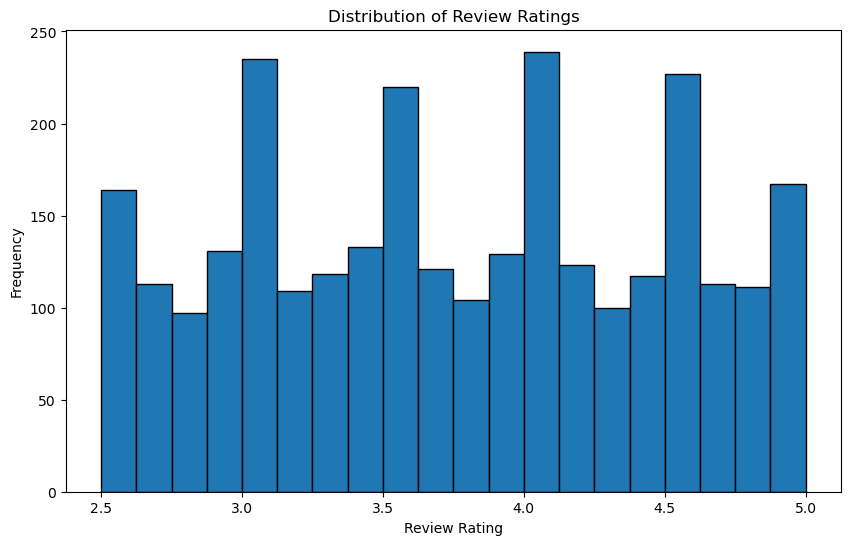

In [14]:
# Plot 1: Distribution of Review Ratings

plt.figure(figsize=(10, 6))
plt.hist(df['Review Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

Next, let's explore the frequency of purchases to see how often customers shop on the platform.

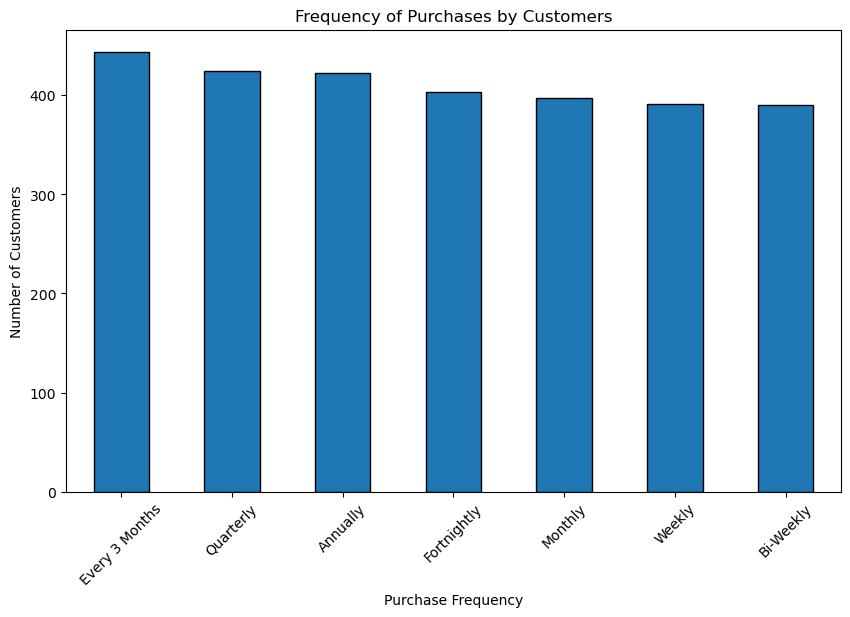

In [15]:

# Plot 2: Frequency of purchases by customers
plt.figure(figsize=(10, 6))
df['Frequency of Purchases'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Frequency of Purchases by Customers')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In order to improve our customer satisfaction, we need to understand the times of year when we have the highest sales and also analyze the geographic distribution of our customers. Let's find the distribution of sales over the months as well as the top 10 geographic locations with the highest number of customers.

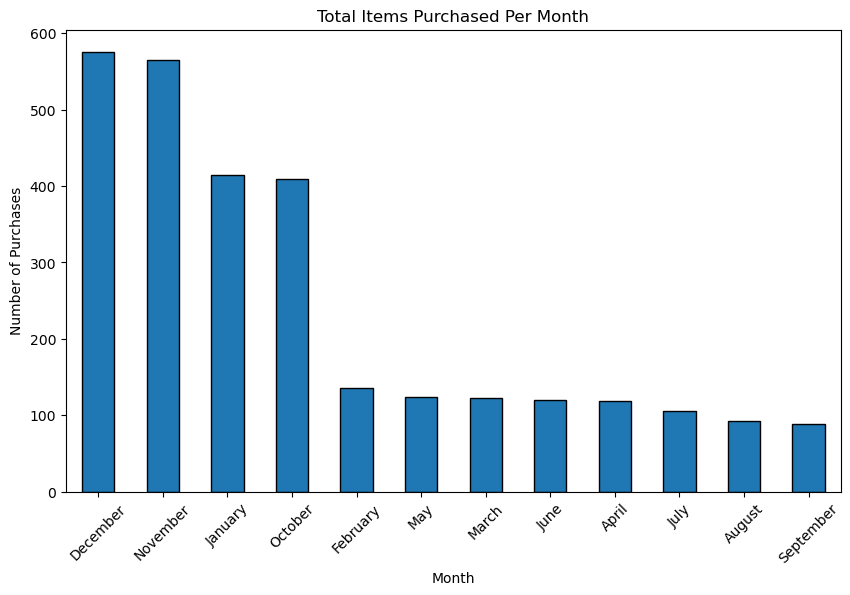

In [16]:
# Plot 3: Distribution of sales over month

monthly_purchases = df.groupby('Month_Name').size().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_purchases.plot(kind='bar', edgecolor='black')
plt.title('Total Items Purchased Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

Let's examine the top 10 States in terms of number of sales.  

In [ ]:
# Plot 4: Top 10 Geographic location of customers
plt.figure(figsize=(10, 6))

top_10 = df['Location'].value_counts().sort_values(ascending=False).head(10)

plt.bar(top_10.index, top_10.values)
plt.title('Geographic Distribution of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()


Let's now analyze the data by product category, which can provide a more detailed understanding of spending habits.

In [ ]:
# Plot 5: Most purchased product categories



In our next and final visualization, we will look into the rating distribution across various categories. To do this, we use a specific type of chart called **Box Plot**. `plt.boxplot` creates this chart for us. To use it, we need to extract the ratings for each category and put them into a `list`.

In [ ]:
# Plot 6: Ratings distribution across product categories


# Conclusions and Next Steps

In this project, we analyzed an e-commerce dataset to uncover key insights into customer purchasing behaviors. We explored product categories, review ratings, purchase frequency, and geographic distribution, gaining insights into customer preferences and engagement trends. These insights help identify which product categories are most popular, how frequently customers make purchases, and how satisfied they are with their purchases.

We found that **Clothing** and **Accessories** are the top two purchased categories, and that the review ratings across all categories are almost identical. To improve the customer experience, we now need to dive into the reviews left for each product to understand the reasons behind the low ratings. This analysis has helped us narrow down our focus to the most popular categories and locations.

Data analysts and scientists will take this analysis to the next step by creating a dashboard that displays all these metrics and charts in an interactive and dynamic report. They will perform in-depth statistical analysis to understand the factors impacting the low ratings and then create a machine learning model that can predict the rating for an item before it is released.

<div id="container" style="position:relative;">
    <div style="position:relative; float:right">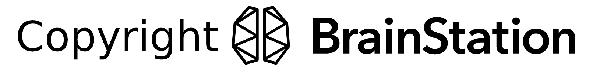
    </div>
</div>